In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
pd.options.display.max_columns=None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

In [3]:
df_riders = pd.read_csv('Riders.csv')
df_riders.head()

Rider ID  Active Rider Age  Average Partner Rating  Number of Ratings
0     16261               308                   21.05                321
1      8832               224                   10.00                 27
2     53866               238                   17.76                 25
3     46368               343                   24.56                320
4     45609               399                   14.97                214

In [4]:
df_riders.shape

(2632, 4)

In [5]:
df_train = pd.read_csv('Train.csv')
df_train.head()

ID  order_id  dispatch_day  dispatch_day_of_week dispatch_time  \
0  ID_SCUW21PVAU      4435            27                     6      09:02:54   
1  ID_2HA7X30JMN     32711            30                     7      13:01:37   
2  ID_IAJWDTBY6M      8712            14                     2      10:01:00   
3  ID_LKSVPNYMTR     44869            22                     3      14:11:16   
4  ID_O7N8Y918YH     57590            27                     5      16:11:38   

   client_id client_type  order_license_status  order_carrier_type  \
0     593630    Business                     0                   2   
1     837729    Personal                     0                   1   
2     695129    Personal                     0                   2   
3    1504660    Personal                     0                   2   
4      36869    Business                     0                   2   

  vendor_type  rider_id  rider_license_status  rider_carrier_type  \
0        Bike     30153                     0                   1   
1        Bike     20884                     0                   1   
2        Bike     33143                     1                   1   
3        Bike     96531                     1                   1   
4        Bike    103546                     0                   0   

   rider_amount  rider_lat  rider_long  pickup_lat  pickup_long  drop_off_lat  \
0          1080 -42.698343  -17.228539  -42.692371   -17.248305    -42.687442   
1           730 -42.787317  -17.288252  -42.784046   -17.290121    -42.673267   
2           490 -42.749180  -17.287848  -42.765204   -17.293784    -42.813953   
3           510 -42.836266  -17.311920  -42.831913   -17.315311    -42.812409   
4           400 -42.828195  -17.322818  -42.836056   -17.318111    -42.828517   

   drop_off_long  target  
0     -17.424682       1  
1     -17.234595       2  
2     -17.294805       1  
3     -17.265441       2  
4     -17.302052       0

In [6]:
print(f'Dataset shape: {df_train.shape}')

Dataset shape: (179867, 21)


## Merge Train Data and Riders data on Rider ID

In [7]:
train_final_df = pd.merge(df_riders, df_train, right_on='rider_id',left_on='Rider ID')

In [8]:
train_final_df.shape

(179867, 25)

In [9]:
train_final_df.head()

Rider ID  Active Rider Age  Average Partner Rating  Number of Ratings  \
0     16261               308                   21.05                321   
1     16261               308                   21.05                321   
2     16261               308                   21.05                321   
3     16261               308                   21.05                321   
4     16261               308                   21.05                321   

              ID  order_id  dispatch_day  dispatch_day_of_week dispatch_time  \
0  ID_XWAQL1261G     28445             5                     3      12:10:10   
1  ID_WTFH1IRGM8     20856             9                     6      11:10:06   
2  ID_DMKIQW7W5S     37050            20                     5      13:11:43   
3  ID_O718HTI3YX     45275            23                     2      14:11:49   
4  ID_J2UGQWIGMJ     62538            30                     4      18:09:36   

   client_id client_type  order_license_status  order_carrier_type  \
0     593630    Business                     0                   2   
1      57569    Business                     0                   1   
2     406617    Personal                     1                   2   
3     593630    Business                     0                   2   
4    2255196    Personal                     0                   2   

  vendor_type  rider_id  rider_license_status  rider_carrier_type  \
0        Bike     16261                     1                   1   
1        Bike     16261                     1                   1   
2        Bike     16261                     1                   1   
3        Bike     16261                     1                   1   
4        Bike     16261                     1                   1   

   rider_amount  rider_lat  rider_long  pickup_lat  pickup_long  drop_off_lat  \
0           420 -42.820903  -17.264040  -42.807802   -17.262792    -42.803654   
1           430 -42.808702  -17.300112  -42.808444   -17.286940    -42.793624   
2           710 -42.836059  -17.283122  -42.830750   -17.280822    -42.768221   
3           510 -42.792183  -17.304695  -42.801147   -17.304942    -42.787833   
4           670 -42.758051  -17.231399  -42.730450   -17.234709    -42.793427   

   drop_off_long  target  
0     -17.259402       0  
1     -17.266942       0  
2     -17.389966       0  
3     -17.257167       1  
4     -17.273211       0

# Data Engineering

In [10]:
train_final_df.isnull().sum()

Rider ID                  0
Active Rider Age          0
Average Partner Rating    0
Number of Ratings         0
ID                        0
order_id                  0
dispatch_day              0
dispatch_day_of_week      0
dispatch_time             0
client_id                 0
client_type               0
order_license_status      0
order_carrier_type        0
vendor_type               0
rider_id                  0
rider_license_status      0
rider_carrier_type        0
rider_amount              0
rider_lat                 0
rider_long                0
pickup_lat                0
pickup_long               0
drop_off_lat              0
drop_off_long             0
target                    0
dtype: int64

The data has zero missing values

In [11]:
train_final_df.dtypes

Rider ID                    int64
Active Rider Age            int64
Average Partner Rating    float64
Number of Ratings           int64
ID                         object
order_id                    int64
dispatch_day                int64
dispatch_day_of_week        int64
dispatch_time              object
client_id                   int64
client_type                object
order_license_status        int64
order_carrier_type          int64
vendor_type                object
rider_id                    int64
rider_license_status        int64
rider_carrier_type          int64
rider_amount                int64
rider_lat                 float64
rider_long                float64
pickup_lat                float64
pickup_long               float64
drop_off_lat              float64
drop_off_long             float64
target                      int64
dtype: object

## Identifying outliers

In [12]:
def tukey_rule(data_frame, column_name):
    data = data_frame[column_name]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR

    return data_frame[(data_frame[column_name] < max_value) & (data_frame[column_name] > min_value)]


In [13]:
df_outlier_removed = train_final_df.copy()
for column in ['Rider ID', 'rider_amount']:
    df_outlier_removed = tukey_rule(df_outlier_removed, column)

In [14]:
## df_outlier_removed

In [15]:
import plotly_express as px

In [16]:
train_final_df['dispatch_day_of_week'].value_counts()

6    33832
5    31774
2    31044
4    30982
3    30676
7    15219
1     6340
Name: dispatch_day_of_week, dtype: int64

In [17]:
train_final_df['dispatch_day'].value_counts()

20    8137
21    7302
10    6668
23    6666
9     6487
14    6468
16    6424
13    6367
28    6348
15    6268
22    6261
27    6214
24    6152
11    6143
30    6115
17    5924
19    5853
18    5843
29    5759
6     5748
8     5387
5     5328
25    5309
2     5236
7     5100
4     5080
26    5015
31    4980
3     4610
12    4303
1     2372
Name: dispatch_day, dtype: int64

In [18]:
px.bar(x = train_final_df['dispatch_day_of_week'].value_counts().index,
      y = train_final_df['dispatch_day_of_week'].value_counts())

In [19]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [20]:
train_final_df['vendor_type'].value_counts()

Bike    179867
Name: vendor_type, dtype: int64

## Vendor type is bike only

In [21]:
train_final_df = train_final_df.set_index('ID')
train_final_df.head()

Rider ID  Active Rider Age  Average Partner Rating  \
ID                                                                  
ID_XWAQL1261G     16261               308                   21.05   
ID_WTFH1IRGM8     16261               308                   21.05   
ID_DMKIQW7W5S     16261               308                   21.05   
ID_O718HTI3YX     16261               308                   21.05   
ID_J2UGQWIGMJ     16261               308                   21.05   

               Number of Ratings  order_id  dispatch_day  \
ID                                                         
ID_XWAQL1261G                321     28445             5   
ID_WTFH1IRGM8                321     20856             9   
ID_DMKIQW7W5S                321     37050            20   
ID_O718HTI3YX                321     45275            23   
ID_J2UGQWIGMJ                321     62538            30   

               dispatch_day_of_week dispatch_time  client_id client_type  \
ID                                                                         
ID_XWAQL1261G                     3      12:10:10     593630    Business   
ID_WTFH1IRGM8                     6      11:10:06      57569    Business   
ID_DMKIQW7W5S                     5      13:11:43     406617    Personal   
ID_O718HTI3YX                     2      14:11:49     593630    Business   
ID_J2UGQWIGMJ                     4      18:09:36    2255196    Personal   

               order_license_status  order_carrier_type vendor_type  rider_id  \
ID                                                                              
ID_XWAQL1261G                     0                   2        Bike     16261   
ID_WTFH1IRGM8                     0                   1        Bike     16261   
ID_DMKIQW7W5S                     1                   2        Bike     16261   
ID_O718HTI3YX                     0                   2        Bike     16261   
ID_J2UGQWIGMJ                     0                   2        Bike     16261   

               rider_license_status  rider_carrier_type  rider_amount  \
ID                                                                      
ID_XWAQL1261G                     1                   1           420   
ID_WTFH1IRGM8                     1                   1           430   
ID_DMKIQW7W5S                     1                   1           710   
ID_O718HTI3YX                     1                   1           510   
ID_J2UGQWIGMJ                     1                   1           670   

               rider_lat  rider_long  pickup_lat  pickup_long  drop_off_lat  \
ID                                                                            
ID_XWAQL1261G -42.820903  -17.264040  -42.807802   -17.262792    -42.803654   
ID_WTFH1IRGM8 -42.808702  -17.300112  -42.808444   -17.286940    -42.793624   
ID_DMKIQW7W5S -42.836059  -17.283122  -42.830750   -17.280822    -42.768221   
ID_O718HTI3YX -42.792183  -17.304695  -42.801147   -17.304942    -42.787833   
ID_J2UGQWIGMJ -42.758051  -17.231399  -42.730450   -17.234709    -42.793427   

               drop_off_long  target  
ID                                    
ID_XWAQL1261G     -17.259402       0  
ID_WTFH1IRGM8     -17.266942       0  
ID_DMKIQW7W5S     -17.389966       0  
ID_O718HTI3YX     -17.257167       1  
ID_J2UGQWIGMJ     -17.273211       0

In [22]:
from datetime import datetime

In [23]:
train_final_df['dispatch_time'] = pd.to_datetime(train_final_df['dispatch_time'], format = '%H:%M:%S')
train_final_df.head()

Rider ID  Active Rider Age  Average Partner Rating  \
ID                                                                  
ID_XWAQL1261G     16261               308                   21.05   
ID_WTFH1IRGM8     16261               308                   21.05   
ID_DMKIQW7W5S     16261               308                   21.05   
ID_O718HTI3YX     16261               308                   21.05   
ID_J2UGQWIGMJ     16261               308                   21.05   

               Number of Ratings  order_id  dispatch_day  \
ID                                                         
ID_XWAQL1261G                321     28445             5   
ID_WTFH1IRGM8                321     20856             9   
ID_DMKIQW7W5S                321     37050            20   
ID_O718HTI3YX                321     45275            23   
ID_J2UGQWIGMJ                321     62538            30   

               dispatch_day_of_week       dispatch_time  client_id  \
ID                                                                   
ID_XWAQL1261G                     3 1900-01-01 12:10:10     593630   
ID_WTFH1IRGM8                     6 1900-01-01 11:10:06      57569   
ID_DMKIQW7W5S                     5 1900-01-01 13:11:43     406617   
ID_O718HTI3YX                     2 1900-01-01 14:11:49     593630   
ID_J2UGQWIGMJ                     4 1900-01-01 18:09:36    2255196   

              client_type  order_license_status  order_carrier_type  \
ID                                                                    
ID_XWAQL1261G    Business                     0                   2   
ID_WTFH1IRGM8    Business                     0                   1   
ID_DMKIQW7W5S    Personal                     1                   2   
ID_O718HTI3YX    Business                     0                   2   
ID_J2UGQWIGMJ    Personal                     0                   2   

              vendor_type  rider_id  rider_license_status  rider_carrier_type  \
ID                                                                              
ID_XWAQL1261G        Bike     16261                     1                   1   
ID_WTFH1IRGM8        Bike     16261                     1                   1   
ID_DMKIQW7W5S        Bike     16261                     1                   1   
ID_O718HTI3YX        Bike     16261                     1                   1   
ID_J2UGQWIGMJ        Bike     16261                     1                   1   

               rider_amount  rider_lat  rider_long  pickup_lat  pickup_long  \
ID                                                                            
ID_XWAQL1261G           420 -42.820903  -17.264040  -42.807802   -17.262792   
ID_WTFH1IRGM8           430 -42.808702  -17.300112  -42.808444   -17.286940   
ID_DMKIQW7W5S           710 -42.836059  -17.283122  -42.830750   -17.280822   
ID_O718HTI3YX           510 -42.792183  -17.304695  -42.801147   -17.304942   
ID_J2UGQWIGMJ           670 -42.758051  -17.231399  -42.730450   -17.234709   

               drop_off_lat  drop_off_long  target  
ID                                                  
ID_XWAQL1261G    -42.803654     -17.259402       0  
ID_WTFH1IRGM8    -42.793624     -17.266942       0  
ID_DMKIQW7W5S    -42.768221     -17.389966       0  
ID_O718HTI3YX    -42.787833     -17.257167       1  
ID_J2UGQWIGMJ    -42.793427     -17.273211       0

In [24]:
train_final_df['minute'] = train_final_df['dispatch_time'].dt.minute
train_final_df['hour'] = train_final_df['dispatch_time'].dt.hour

In [25]:
train_final_df.head()

Rider ID  Active Rider Age  Average Partner Rating  \
ID                                                                  
ID_XWAQL1261G     16261               308                   21.05   
ID_WTFH1IRGM8     16261               308                   21.05   
ID_DMKIQW7W5S     16261               308                   21.05   
ID_O718HTI3YX     16261               308                   21.05   
ID_J2UGQWIGMJ     16261               308                   21.05   

               Number of Ratings  order_id  dispatch_day  \
ID                                                         
ID_XWAQL1261G                321     28445             5   
ID_WTFH1IRGM8                321     20856             9   
ID_DMKIQW7W5S                321     37050            20   
ID_O718HTI3YX                321     45275            23   
ID_J2UGQWIGMJ                321     62538            30   

               dispatch_day_of_week       dispatch_time  client_id  \
ID                                                                   
ID_XWAQL1261G                     3 1900-01-01 12:10:10     593630   
ID_WTFH1IRGM8                     6 1900-01-01 11:10:06      57569   
ID_DMKIQW7W5S                     5 1900-01-01 13:11:43     406617   
ID_O718HTI3YX                     2 1900-01-01 14:11:49     593630   
ID_J2UGQWIGMJ                     4 1900-01-01 18:09:36    2255196   

              client_type  order_license_status  order_carrier_type  \
ID                                                                    
ID_XWAQL1261G    Business                     0                   2   
ID_WTFH1IRGM8    Business                     0                   1   
ID_DMKIQW7W5S    Personal                     1                   2   
ID_O718HTI3YX    Business                     0                   2   
ID_J2UGQWIGMJ    Personal                     0                   2   

              vendor_type  rider_id  rider_license_status  rider_carrier_type  \
ID                                                                              
ID_XWAQL1261G        Bike     16261                     1                   1   
ID_WTFH1IRGM8        Bike     16261                     1                   1   
ID_DMKIQW7W5S        Bike     16261                     1                   1   
ID_O718HTI3YX        Bike     16261                     1                   1   
ID_J2UGQWIGMJ        Bike     16261                     1                   1   

               rider_amount  rider_lat  rider_long  pickup_lat  pickup_long  \
ID                                                                            
ID_XWAQL1261G           420 -42.820903  -17.264040  -42.807802   -17.262792   
ID_WTFH1IRGM8           430 -42.808702  -17.300112  -42.808444   -17.286940   
ID_DMKIQW7W5S           710 -42.836059  -17.283122  -42.830750   -17.280822   
ID_O718HTI3YX           510 -42.792183  -17.304695  -42.801147   -17.304942   
ID_J2UGQWIGMJ           670 -42.758051  -17.231399  -42.730450   -17.234709   

               drop_off_lat  drop_off_long  target  minute  hour  
ID                                                                
ID_XWAQL1261G    -42.803654     -17.259402       0      10    12  
ID_WTFH1IRGM8    -42.793624     -17.266942       0      10    11  
ID_DMKIQW7W5S    -42.768221     -17.389966       0      11    13  
ID_O718HTI3YX    -42.787833     -17.257167       1      11    14  
ID_J2UGQWIGMJ    -42.793427     -17.273211       0       9    18

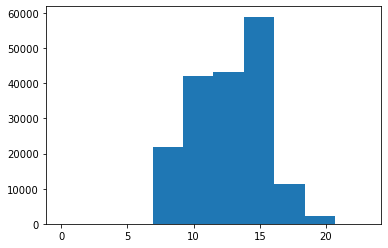

In [26]:
plt.hist(train_final_df['hour'])
plt.show()

In [27]:
train_final_df.groupby('dispatch_day')['hour'].count()

dispatch_day
1     2372
2     5236
3     4610
4     5080
5     5328
6     5748
7     5100
8     5387
9     6487
10    6668
11    6143
12    4303
13    6367
14    6468
15    6268
16    6424
17    5924
18    5843
19    5853
20    8137
21    7302
22    6261
23    6666
24    6152
25    5309
26    5015
27    6214
28    6348
29    5759
30    6115
31    4980
Name: hour, dtype: int64

In [28]:
trace1 = go.Bar(
    x = train_final_df.groupby('dispatch_day')['hour'].count().index,
    y = train_final_df.groupby('dispatch_day')['hour'].count(),
    name = 'priority'
)

In [29]:
iplot([trace1])

<AxesSubplot:xlabel='hour', ylabel='count'>

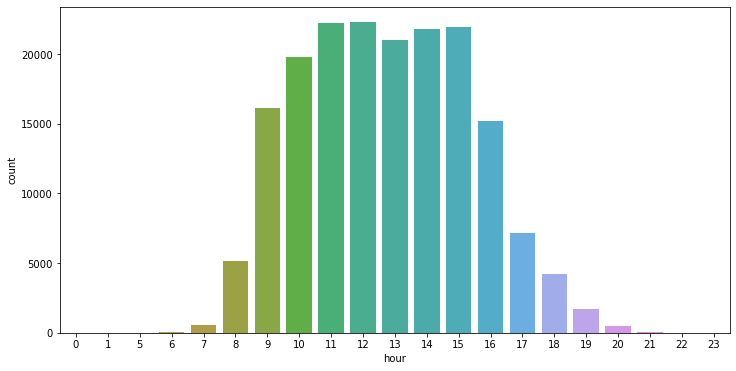

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(train_final_df['hour'])

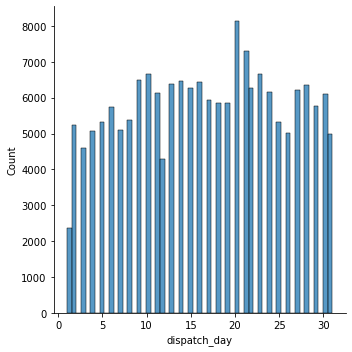

In [31]:
sns.displot(train_final_df['dispatch_day'])
plt.show()

<AxesSubplot:xlabel='hour', ylabel='rider_lat'>

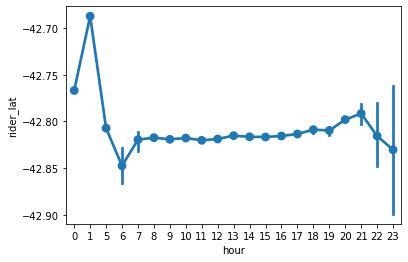

In [32]:
sns.pointplot(x='hour', y = 'rider_lat', data=train_final_df)

<AxesSubplot:xlabel='hour', ylabel='drop_off_lat'>

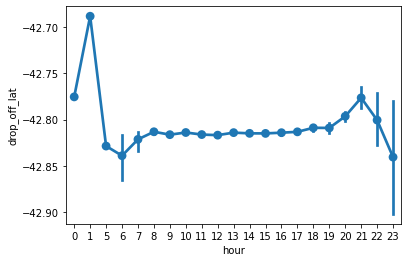

In [33]:
sns.pointplot(x='hour', y = 'drop_off_lat', data=train_final_df)

<AxesSubplot:xlabel='hour', ylabel='pickup_lat'>

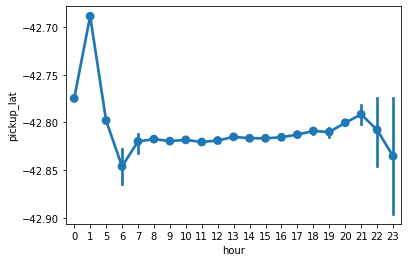

In [34]:
sns.pointplot(x='hour', y = 'pickup_lat', data=train_final_df)

Text(0.5, 1.0, 'hoursOffDay versus Latitude of riders')

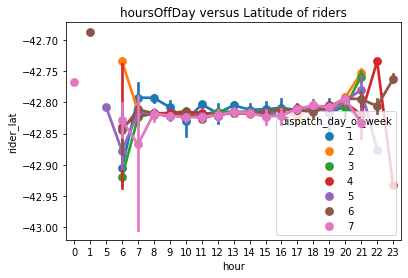

In [35]:
ax = sns.pointplot(x='hour', y = 'rider_lat', data=train_final_df, hue = 'dispatch_day_of_week')
ax.set_title('hoursOffDay versus Latitude of riders')

Text(0.5, 1.0, 'hoursOffDay versus Latitude of Drop Off')

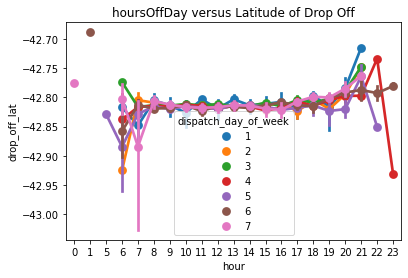

In [36]:
ax = sns.pointplot(x='hour', y = 'drop_off_lat', data=train_final_df, hue = 'dispatch_day_of_week')
ax.set_title('hoursOffDay versus Latitude of Drop Off')

Text(0.5, 1.0, 'hoursOffDay versus Latitude of Pick Up')

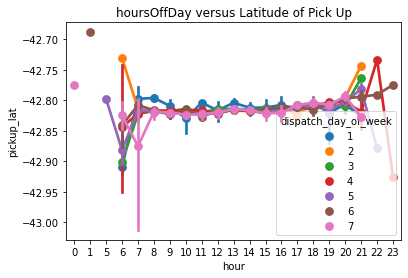

In [37]:
ax = sns.pointplot(x='hour', y = 'pickup_lat', data=train_final_df, hue = 'dispatch_day_of_week')
ax.set_title('hoursOffDay versus Latitude of Pick Up')

In [38]:
train_final_df.groupby(['rider_id', 'dispatch_day_of_week'])['hour'].count()

rider_id  dispatch_day_of_week
1817      2                       153
          3                       104
          4                       135
          5                       182
          6                       150
          7                        43
3864      1                       176
          2                       170
          3                       151
          4                        76
          5                        81
          6                       180
          7                       181
5290      1                         5
          2                        22
          3                        20
          4                        23
          5                        35
          6                        21
          7                        14
5428      1                        10
          2                       105
          3                       125
          4                       101
          5                       102
          6        

In [39]:
train_final_df['rider_id'].nunique()

764

## There are 764 unique riders

In [40]:
amount_sum = train_final_df.groupby(['rider_id', 'dispatch_day_of_week'])['hour'].sum().reset_index()

In [41]:
amount_sum.columns

Index(['rider_id', 'dispatch_day_of_week', 'hour'], dtype='object')

<AxesSubplot:xlabel='dispatch_day_of_week', ylabel='hour'>

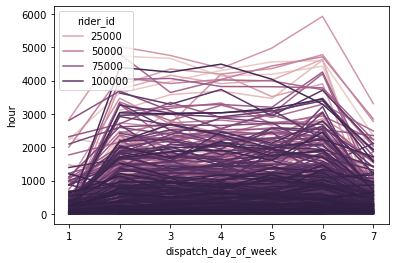

In [42]:
sns.lineplot(x = 'dispatch_day_of_week', y = 'hour', hue = 'rider_id', data = amount_sum)

In [43]:
def count_rows(row):
    return len(row)

In [44]:
by_cross = train_final_df.groupby(['dispatch_day_of_week', 'hour']).apply(count_rows)
by_cross

dispatch_day_of_week  hour
1                     6          2
                      7         16
                      8        118
                      9        361
                      10       575
                      11       715
                      12       740
                      13       761
                      14       802
                      15       778
                      16       593
                      17       395
                      18       273
                      19       165
                      20        45
                      21         1
2                     6          1
                      7        118
                      8        734
                      9       2822
                      10      3532
                      11      3713
                      12      3823
                      13      3766
                      14      3659
                      15      3961
                      16      2788
                      17    

In [45]:
pivot = by_cross.unstack()
pivot

hour                   0    1    5     6      7      8       9       10  \
dispatch_day_of_week                                                      
1                     NaN  NaN  NaN   2.0   16.0  118.0   361.0   575.0   
2                     NaN  NaN  NaN   1.0  118.0  734.0  2822.0  3532.0   
3                     NaN  NaN  NaN   1.0   96.0  964.0  3154.0  3314.0   
4                     NaN  NaN  NaN   3.0   76.0  947.0  2719.0  3471.0   
5                     NaN  NaN  1.0   8.0  105.0  884.0  2804.0  3476.0   
6                     NaN  1.0  NaN  10.0  120.0  895.0  2802.0  3270.0   
7                     1.0  NaN  NaN  14.0   44.0  579.0  1495.0  2169.0   

hour                      11      12      13      14      15      16      17  \
dispatch_day_of_week                                                           
1                      715.0   740.0   761.0   802.0   778.0   593.0   395.0   
2                     3713.0  3823.0  3766.0  3659.0  3961.0  2788.0  1243.0   
3                     3789.0  3721.0  3638.0  3953.0  3854.0  2357.0   980.0   
4                     3851.0  3983.0  3714.0  3955.0  3727.0  2539.0  1098.0   
5                     3640.0  4122.0  3995.0  3846.0  4044.0  2612.0  1211.0   
6                     4145.0  4156.0  3717.0  4129.0  4485.0  3118.0  1481.0   
7                     2349.0  1742.0  1425.0  1468.0  1095.0  1196.0   771.0   

hour                      18     19     20    21   22   23  
dispatch_day_of_week                                        
1                      273.0  165.0   45.0   1.0  NaN  NaN  
2                      577.0  249.0   55.0   3.0  NaN  NaN  
3                      554.0  246.0   50.0   5.0  NaN  NaN  
4                      545.0  257.0   87.0   7.0  1.0  2.0  
5                      660.0  260.0  100.0   4.0  2.0  NaN  
6                     1033.0  361.0   82.0  20.0  4.0  3.0  
7                      584.0  202.0   84.0   1.0  NaN  NaN

<AxesSubplot:xlabel='hour', ylabel='dispatch_day_of_week'>

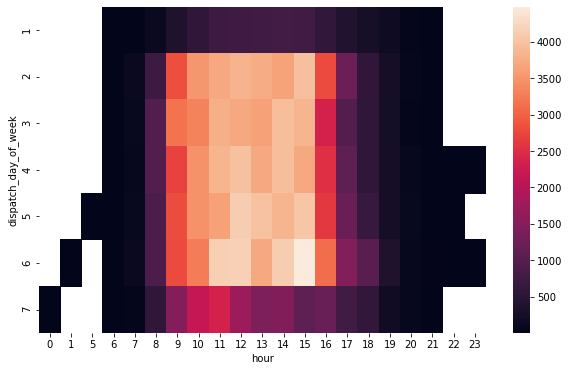

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot)

In [47]:
train_final_df.columns

Index(['Rider ID', 'Active Rider Age', 'Average Partner Rating',
       'Number of Ratings', 'order_id', 'dispatch_day', 'dispatch_day_of_week',
       'dispatch_time', 'client_id', 'client_type', 'order_license_status',
       'order_carrier_type', 'vendor_type', 'rider_id', 'rider_license_status',
       'rider_carrier_type', 'rider_amount', 'rider_lat', 'rider_long',
       'pickup_lat', 'pickup_long', 'drop_off_lat', 'drop_off_long', 'target',
       'minute', 'hour'],
      dtype='object')

## Perform Spatial Analysis on Riders

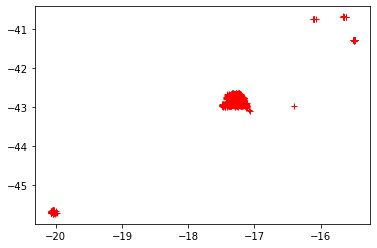

In [48]:
plt.plot(train_final_df['rider_long'], train_final_df['rider_lat'], 'r+')
plt.show()

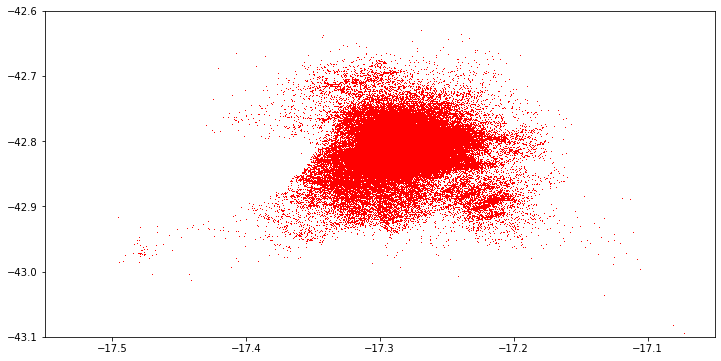

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(train_final_df['rider_long'], train_final_df['rider_lat'], 'r+', ms = 0.5)
#plt.plot(df['Lon'], df['Lat'], 'r+', ms = 0.5)
plt.xlim(-17.55, -17.05)
plt.ylim(-43.1, -42.6)
plt.show()

In [50]:
import folium
from folium.plugins import HeatMap

In [51]:
folium.Map()

In [52]:
df_out = train_final_df[train_final_df['dispatch_day_of_week'] == 5]
df_out.shape

(31774, 26)

In [53]:
df_out.groupby(['rider_lat', 'rider_long'])['dispatch_day_of_week'].count()

rider_lat   rider_long
-45.728563  -20.005160    1
-45.720295  -20.018864    1
-45.700225  -20.068421    1
-45.698643  -20.068371    1
-45.691397  -20.038693    1
-45.689752  -20.074210    1
-45.688723  -20.046855    1
-45.688126  -20.047723    1
-45.688078  -20.047752    1
-45.688025  -20.047771    1
-45.687994  -20.047566    1
-45.687955  -20.047781    1
-45.687952  -20.047618    1
-45.687888  -20.047672    1
-45.687663  -20.047942    1
-45.686904  -20.056499    1
-45.685894  -20.047771    1
-45.685727  -20.048650    1
-45.682549  -20.066922    1
-45.681433  -20.046441    1
-45.681116  -20.020209    1
-45.680463  -20.067148    1
-45.679681  -20.046715    1
-45.679434  -20.044369    1
-45.678745  -20.020330    1
-45.677206  -20.041400    1
-45.676027  -20.031396    1
-45.672395  -20.036225    1
-45.671110  -20.040437    1
-45.671049  -20.074251    1
-45.670814  -20.021824    1
-45.663384  -20.047805    1
-45.660400  -20.059761    1
-45.658010  -20.053040    1
-45.649416  -20.047399   

In [54]:
rush = df_out.groupby(['rider_lat', 'rider_long'])['dispatch_day_of_week'].count().reset_index()

In [55]:
rush.columns = ['Lat', 'Lon', 'no of trips']
rush.head()

Lat        Lon  no of trips
0 -45.728563 -20.005160            1
1 -45.720295 -20.018864            1
2 -45.700225 -20.068421            1
3 -45.698643 -20.068371            1
4 -45.691397 -20.038693            1

In [56]:
basemap = folium.Map()

In [57]:
HeatMap(rush, zoom = 20, radius = 15).add_to(basemap)
basemap

In [58]:
def plt_map(df, day, lat, long):
    basemap = folium.Map()
    df_out = df[df['dispatch_day_of_week'] == day]
    HeatMap(df_out.groupby([lat, long])['dispatch_day_of_week'].count().reset_index(),zoom = 20, radius = 15).add_to(basemap)
    return basemap

In [59]:
plt_map(train_final_df, 1, 'rider_lat', 'rider_long')

In [60]:
## Perform Spatial Analysis on Drop off

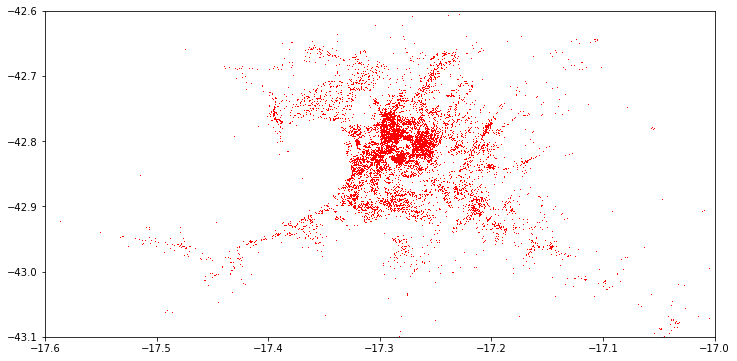

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(train_final_df['drop_off_long'], train_final_df['drop_off_lat'], 'r+', ms = 0.5)
plt.xlim(-17.60, -17.00)
plt.ylim(-43.1, -42.6)
plt.show()

In [62]:
plt_map(train_final_df, 1, 'drop_off_lat', 'drop_off_long')

In [63]:
## Perform Spatial Analysis on Pick up

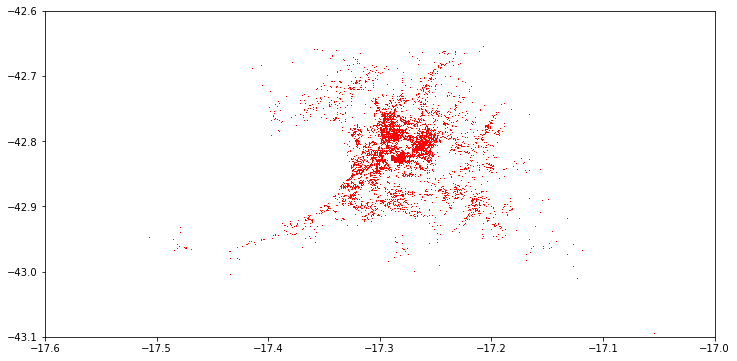

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(train_final_df['pickup_long'], train_final_df['pickup_lat'], 'r+', ms = 0.5)
plt.xlim(-17.60, -17.00)
plt.ylim(-43.1, -42.6)
plt.show()

In [65]:
plt_map(train_final_df, 1, 'pickup_lat', 'pickup_long')

## Machine learning task

In [66]:
train_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179867 entries, ID_XWAQL1261G to ID_60K5CFK5CA
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Rider ID                179867 non-null  int64         
 1   Active Rider Age        179867 non-null  int64         
 2   Average Partner Rating  179867 non-null  float64       
 3   Number of Ratings       179867 non-null  int64         
 4   order_id                179867 non-null  int64         
 5   dispatch_day            179867 non-null  int64         
 6   dispatch_day_of_week    179867 non-null  int64         
 7   dispatch_time           179867 non-null  datetime64[ns]
 8   client_id               179867 non-null  int64         
 9   client_type             179867 non-null  object        
 10  order_license_status    179867 non-null  int64         
 11  order_carrier_type      179867 non-null  int64         
 12  vendor_type     

In [67]:
train_final_df.head()

Rider ID  Active Rider Age  Average Partner Rating  \
ID                                                                  
ID_XWAQL1261G     16261               308                   21.05   
ID_WTFH1IRGM8     16261               308                   21.05   
ID_DMKIQW7W5S     16261               308                   21.05   
ID_O718HTI3YX     16261               308                   21.05   
ID_J2UGQWIGMJ     16261               308                   21.05   

               Number of Ratings  order_id  dispatch_day  \
ID                                                         
ID_XWAQL1261G                321     28445             5   
ID_WTFH1IRGM8                321     20856             9   
ID_DMKIQW7W5S                321     37050            20   
ID_O718HTI3YX                321     45275            23   
ID_J2UGQWIGMJ                321     62538            30   

               dispatch_day_of_week       dispatch_time  client_id  \
ID                                                                   
ID_XWAQL1261G                     3 1900-01-01 12:10:10     593630   
ID_WTFH1IRGM8                     6 1900-01-01 11:10:06      57569   
ID_DMKIQW7W5S                     5 1900-01-01 13:11:43     406617   
ID_O718HTI3YX                     2 1900-01-01 14:11:49     593630   
ID_J2UGQWIGMJ                     4 1900-01-01 18:09:36    2255196   

              client_type  order_license_status  order_carrier_type  \
ID                                                                    
ID_XWAQL1261G    Business                     0                   2   
ID_WTFH1IRGM8    Business                     0                   1   
ID_DMKIQW7W5S    Personal                     1                   2   
ID_O718HTI3YX    Business                     0                   2   
ID_J2UGQWIGMJ    Personal                     0                   2   

              vendor_type  rider_id  rider_license_status  rider_carrier_type  \
ID                                                                              
ID_XWAQL1261G        Bike     16261                     1                   1   
ID_WTFH1IRGM8        Bike     16261                     1                   1   
ID_DMKIQW7W5S        Bike     16261                     1                   1   
ID_O718HTI3YX        Bike     16261                     1                   1   
ID_J2UGQWIGMJ        Bike     16261                     1                   1   

               rider_amount  rider_lat  rider_long  pickup_lat  pickup_long  \
ID                                                                            
ID_XWAQL1261G           420 -42.820903  -17.264040  -42.807802   -17.262792   
ID_WTFH1IRGM8           430 -42.808702  -17.300112  -42.808444   -17.286940   
ID_DMKIQW7W5S           710 -42.836059  -17.283122  -42.830750   -17.280822   
ID_O718HTI3YX           510 -42.792183  -17.304695  -42.801147   -17.304942   
ID_J2UGQWIGMJ           670 -42.758051  -17.231399  -42.730450   -17.234709   

               drop_off_lat  drop_off_long  target  minute  hour  
ID                                                                
ID_XWAQL1261G    -42.803654     -17.259402       0      10    12  
ID_WTFH1IRGM8    -42.793624     -17.266942       0      10    11  
ID_DMKIQW7W5S    -42.768221     -17.389966       0      11    13  
ID_O718HTI3YX    -42.787833     -17.257167       1      11    14  
ID_J2UGQWIGMJ    -42.793427     -17.273211       0       9    18

In [68]:
train_final_df.describe()

Rider ID  Active Rider Age  Average Partner Rating  \
count  179867.000000     179867.000000           179867.000000   
mean    70389.969944        141.981497               17.250388   
std     33981.806096         90.447924                6.250999   
min      1817.000000          0.000000                1.000000   
25%     40756.000000         70.000000               10.000000   
50%     73485.000000        134.000000               19.020000   
75%    100441.000000        196.000000               22.970000   
max    123694.000000        399.000000               24.960000   

       Number of Ratings       order_id   dispatch_day  dispatch_day_of_week  \
count      179867.000000  179867.000000  179867.000000         179867.000000   
mean           82.793948   32639.833149      16.604903              4.185198   
std           103.392784   18227.428596       8.528368              1.683574   
min             0.000000     100.000000       1.000000              1.000000   
25%            12.000000   16875.000000       9.000000              3.000000   
50%            49.000000   32964.000000      17.000000              4.000000   
75%           110.000000   48117.000000      24.000000              6.000000   
max           637.000000   64427.000000      31.000000              7.000000   

          client_id  order_license_status  order_carrier_type       rider_id  \
count  1.798670e+05         179867.000000       179867.000000  179867.000000   
mean   4.654108e+05              0.239555            1.619007   70389.969944   
std    6.634234e+05              0.426813            0.536552   33981.806096   
min    2.610000e+02              0.000000            0.000000    1817.000000   
25%    7.564700e+04              0.000000            1.000000   40756.000000   
50%    1.434280e+05              0.000000            2.000000   73485.000000   
75%    5.936300e+05              0.000000            2.000000  100441.000000   
max    2.568456e+06              1.000000            2.000000  123694.000000   

       rider_license_status  rider_carrier_type   rider_amount      rider_lat  \
count         179867.000000       179867.000000  179867.000000  179867.000000   
mean               0.589936            0.868731     517.544185     -42.817124   
std                0.491846            0.337695     157.385430       0.106837   
min                0.000000            0.000000     200.000000     -45.736540   
25%                0.000000            1.000000     410.000000     -42.832252   
50%                1.000000            1.000000     460.000000     -42.813961   
75%                1.000000            1.000000     570.000000     -42.791405   
max                1.000000            1.000000    2190.000000     -40.676917   

          rider_long     pickup_lat    pickup_long   drop_off_lat  \
count  179867.000000  179867.000000  179867.000000  179867.000000   
mean      -17.286813     -42.817156     -17.286229     -42.814879   
std         0.100707       0.106425       0.100101       0.114158   
min       -20.079067     -45.725110     -20.070241     -45.793523   
25%       -17.301329     -42.829119     -17.299970     -42.830628   
50%       -17.286776     -42.820037     -17.283554     -42.806976   
75%       -17.264774     -42.789742     -17.263246     -42.783811   
max       -15.480446     -40.699055     -15.482671     -40.683763   

       drop_off_long         target         minute           hour  
count  179867.000000  179867.000000  179867.000000  179867.000000  
mean      -17.282547       0.652843       7.400741      12.752350  
std         0.103640       0.791099       4.367201       2.631737  
min       -20.352897       0.000000       1.000000       0.000000  
25%       -17.301066       0.000000       2.000000      11.000000  
50%       -17.282880       0.000000       9.000000      13.000000  
75%       -17.259310       1.000000      11.000000      15.000000  
max       -15.324765       2.000000      12.000000      23.000000

#### How many riders do we have?

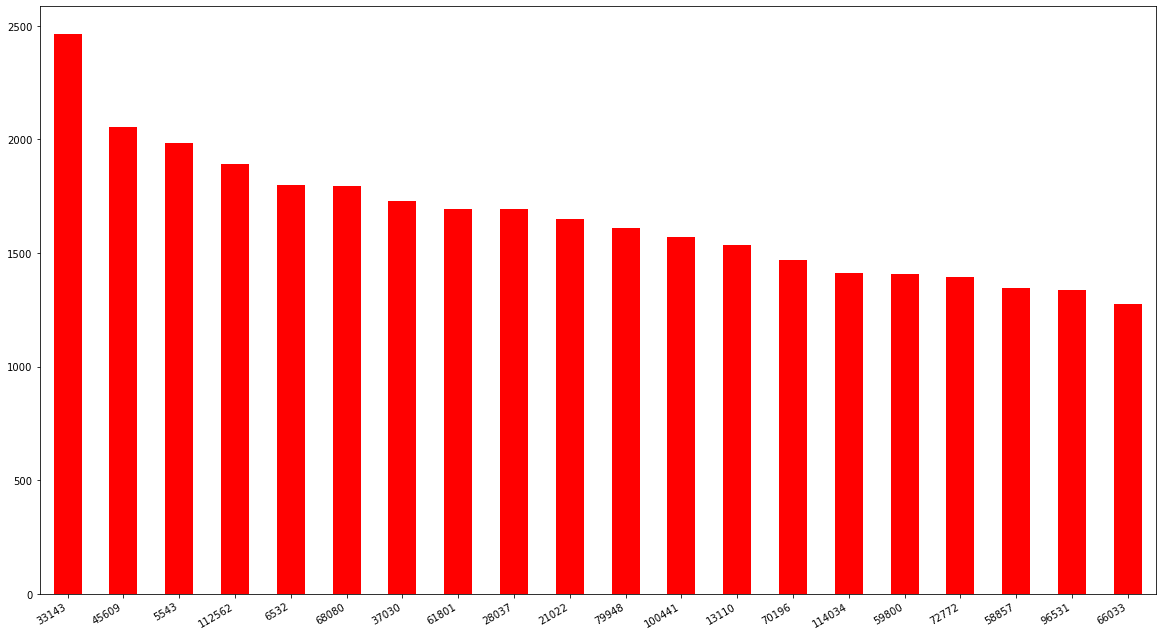

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
train_final_df['Rider ID'].value_counts().nlargest(20).plot.bar(color='red')

### to provide styling to text on x-axis
plt.gcf().autofmt_xdate()

In [70]:
train_final_df['rider_carrier_type'].value_counts()

1    156256
0     23611
Name: rider_carrier_type, dtype: int64

In [71]:
train_final_df['target'].value_counts()

0    98343
1    45623
2    35901
Name: target, dtype: int64

In [72]:
train_final_df['target'].value_counts(normalize=True, dropna=False)

0    0.546754
1    0.253649
2    0.199597
Name: target, dtype: float64

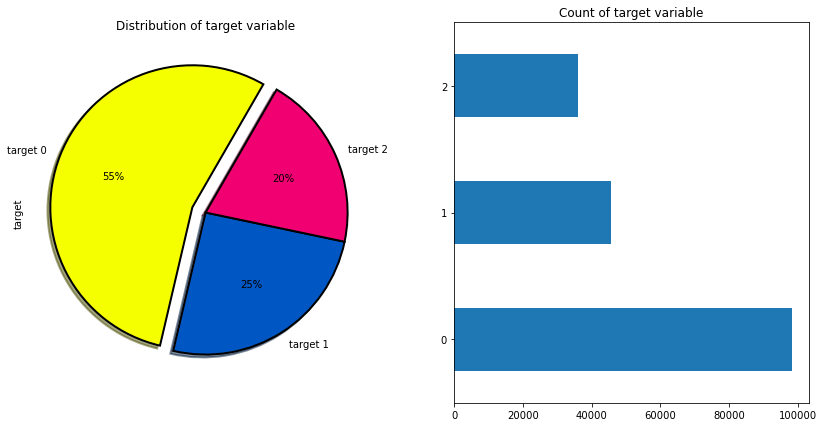

In [73]:
plt.figure(figsize=(14,7))
plt.subplot(121)
train_final_df['target'].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["target 0","target 1", "target 2"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0, 0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
train_final_df['target'].value_counts().plot(kind="barh")

for i,j in enumerate(train_final_df['target'].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

In [74]:
cat_features= [col for col in train_final_df.columns if train_final_df[col].dtype == 'O']
num_features= [col for col in train_final_df.columns if train_final_df[col].dtype != 'O']

In [75]:
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, train_final_df[feature].nunique()))

client_type has total 2 unique features
vendor_type has total 1 unique features


In [76]:
for feature in num_features:
    print('{} has total {} unique features'.format(feature, train_final_df[feature].nunique()))

Rider ID has total 764 unique features
Active Rider Age has total 202 unique features
Average Partner Rating has total 433 unique features
Number of Ratings has total 252 unique features
order_id has total 58848 unique features
dispatch_day has total 31 unique features
dispatch_day_of_week has total 7 unique features
dispatch_time has total 5636 unique features
client_id has total 5141 unique features
order_license_status has total 2 unique features
order_carrier_type has total 3 unique features
rider_id has total 764 unique features
rider_license_status has total 2 unique features
rider_carrier_type has total 2 unique features
rider_amount has total 177 unique features
rider_lat has total 156002 unique features
rider_long has total 154548 unique features
pickup_lat has total 7633 unique features
pickup_long has total 7655 unique features
drop_off_lat has total 12172 unique features
drop_off_long has total 12213 unique features
target has total 3 unique features
minute has total 7 uniq

In [77]:
train_final_df.drop(['vendor_type', 'Rider ID', 'order_id', 'dispatch_time', 'client_id',
                     'rider_id', 'rider_lat', 'rider_long', 'pickup_lat',
                    'pickup_long', 'drop_off_lat', 'drop_off_long', 'minute'], axis= 1, inplace=True)

In [78]:
train_final_df.shape

(179867, 13)

In [79]:
train_final_df.columns

Index(['Active Rider Age', 'Average Partner Rating', 'Number of Ratings',
       'dispatch_day', 'dispatch_day_of_week', 'client_type',
       'order_license_status', 'order_carrier_type', 'rider_license_status',
       'rider_carrier_type', 'rider_amount', 'target', 'hour'],
      dtype='object')

In [80]:
cate_features = ['client_type', 'order_license_status', 'order_carrier_type', 'rider_license_status',
                'rider_carrier_type', 'dispatch_day_of_week']

In [81]:
data_cat = train_final_df[cate_features]
for col in cate_features:
    col_encoded = pd.get_dummies(data_cat[col],prefix=col,drop_first=True)
    data_cat=pd.concat([data_cat,col_encoded],axis=1)
    data_cat.drop(col, axis=1, inplace=True)

In [82]:
data_cat.shape

(179867, 12)

In [83]:
data_final=pd.concat([train_final_df.loc[:,['Active Rider Age','Average Partner Rating', 'rider_amount',
                                            'Number of Ratings','target']],data_cat],axis=1)

In [84]:
data_final.shape

(179867, 17)

In [85]:
data_final.head()

Active Rider Age  Average Partner Rating  rider_amount  \
ID                                                                      
ID_XWAQL1261G               308                   21.05           420   
ID_WTFH1IRGM8               308                   21.05           430   
ID_DMKIQW7W5S               308                   21.05           710   
ID_O718HTI3YX               308                   21.05           510   
ID_J2UGQWIGMJ               308                   21.05           670   

               Number of Ratings  target  client_type_Personal  \
ID                                                               
ID_XWAQL1261G                321       0                     0   
ID_WTFH1IRGM8                321       0                     0   
ID_DMKIQW7W5S                321       0                     1   
ID_O718HTI3YX                321       1                     0   
ID_J2UGQWIGMJ                321       0                     1   

               order_license_status_1  order_carrier_type_1  \
ID                                                            
ID_XWAQL1261G                       0                     0   
ID_WTFH1IRGM8                       0                     1   
ID_DMKIQW7W5S                       1                     0   
ID_O718HTI3YX                       0                     0   
ID_J2UGQWIGMJ                       0                     0   

               order_carrier_type_2  rider_license_status_1  \
ID                                                            
ID_XWAQL1261G                     1                       1   
ID_WTFH1IRGM8                     0                       1   
ID_DMKIQW7W5S                     1                       1   
ID_O718HTI3YX                     1                       1   
ID_J2UGQWIGMJ                     1                       1   

               rider_carrier_type_1  dispatch_day_of_week_2  \
ID                                                            
ID_XWAQL1261G                     1                       0   
ID_WTFH1IRGM8                     1                       0   
ID_DMKIQW7W5S                     1                       0   
ID_O718HTI3YX                     1                       1   
ID_J2UGQWIGMJ                     1                       0   

               dispatch_day_of_week_3  dispatch_day_of_week_4  \
ID                                                              
ID_XWAQL1261G                       1                       0   
ID_WTFH1IRGM8                       0                       0   
ID_DMKIQW7W5S                       0                       0   
ID_O718HTI3YX                       0                       0   
ID_J2UGQWIGMJ                       0                       1   

               dispatch_day_of_week_5  dispatch_day_of_week_6  \
ID                                                              
ID_XWAQL1261G                       0                       0   
ID_WTFH1IRGM8                       0                       1   
ID_DMKIQW7W5S                       1                       0   
ID_O718HTI3YX                       0                       0   
ID_J2UGQWIGMJ                       0                       0   

               dispatch_day_of_week_7  
ID                                     
ID_XWAQL1261G                       0  
ID_WTFH1IRGM8                       0  
ID_DMKIQW7W5S                       0  
ID_O718HTI3YX                       0  
ID_J2UGQWIGMJ                       0

In [86]:
X = data_final.drop('target', axis=1)
y = data_final['target'].values

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [88]:
# Import the random forest model.
from sklearn.ensemble import RandomForestClassifier

In [89]:
# Initialize the model with some parameters.
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)

In [90]:
# Fit the model to the data.
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=10, random_state=1)

In [91]:
# Make predictions.
predictions = model.predict(X_test)

# Compute the error.
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions, y_test)

array([[17110,  5535,  4969],
       [ 1608,  3116,   543],
       [  932,   591,  1570]], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)

0.6058820259076

In [93]:
#fit naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [94]:
### classifier models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [95]:
for name,model in models:
    print(name)
    print(models)

LogisticRegression
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
Naive Bayes
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
RandomForest
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
Decision Tree
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
KNN
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree'

In [96]:
# Make predictions on validation dataset

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    # Make predictions.
    predictions = model.predict(X_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[19356  9111  6908]
 [   64    38    12]
 [  230    93   162]]
0.5436148329348974


Naive Bayes
[[15294  6647  5120]
 [ 2304  1787   565]
 [ 2052   808  1397]]
0.5136487463167844


RandomForest
[[13863  4548  3614]
 [ 3345  3605  1057]
 [ 2442  1089  2411]]
0.552593539778729


Decision Tree
[[13574  4743  3569]
 [ 3501  3460  1184]
 [ 2575  1039  2329]]
0.538249847111803


KNN
[[15083  4960  4267]
 [ 2802  3514   996]
 [ 1765   768  1819]]
0.5675209873797743




## Output

In [111]:
df_test = pd.read_csv('Test.csv')

In [112]:
test_final_df = pd.merge(df_riders, df_test, right_on='rider_id',left_on='Rider ID')

In [113]:
test_final_df = test_final_df.set_index('ID')
test_final_df.head()

Rider ID  Active Rider Age  Average Partner Rating  \
ID                                                                  
ID_DNPM9J7B3Y     16261               308                   21.05   
ID_7MDCXW50LD     16261               308                   21.05   
ID_0ZRH6ZXR43     16261               308                   21.05   
ID_UIV8NXT335     16261               308                   21.05   
ID_DD8A48KBG6     16261               308                   21.05   

               Number of Ratings  order_id  dispatch_day  \
ID                                                         
ID_DNPM9J7B3Y                321     63722            26   
ID_7MDCXW50LD                321     42315            11   
ID_0ZRH6ZXR43                321     56711             1   
ID_UIV8NXT335                321     55513             1   
ID_DD8A48KBG6                321     42464            27   

               dispatch_day_of_week dispatch_time  client_id client_type  \
ID                                                                         
ID_DNPM9J7B3Y                     1      19:09:59     146625    Business   
ID_7MDCXW50LD                     2      14:09:48      75647    Business   
ID_0ZRH6ZXR43                     7      16:10:02    2413298    Personal   
ID_UIV8NXT335                     2      16:08:43     151271    Business   
ID_DD8A48KBG6                     7      14:09:05      75647    Business   

               order_license_status  order_carrier_type vendor_type  rider_id  \
ID                                                                              
ID_DNPM9J7B3Y                     0                   2        Bike     16261   
ID_7MDCXW50LD                     0                   1        Bike     16261   
ID_0ZRH6ZXR43                     0                   2        Bike     16261   
ID_UIV8NXT335                     0                   1        Bike     16261   
ID_DD8A48KBG6                     1                   1        Bike     16261   

               rider_license_status  rider_carrier_type  rider_amount  \
ID                                                                      
ID_DNPM9J7B3Y                     1                   1           420   
ID_7MDCXW50LD                     1                   1           430   
ID_0ZRH6ZXR43                     1                   1           650   
ID_UIV8NXT335                     1                   1           420   
ID_DD8A48KBG6                     1                   1           710   

               rider_lat  rider_long  pickup_lat  pickup_long  drop_off_lat  \
ID                                                                            
ID_DNPM9J7B3Y -42.749232  -17.253358  -42.742722   -17.262964    -42.745024   
ID_7MDCXW50LD -42.777919  -17.292565  -42.789108   -17.298525    -42.813653   
ID_0ZRH6ZXR43 -42.768361  -17.246412  -42.759405   -17.252869    -42.836189   
ID_UIV8NXT335 -42.845015  -17.325348  -42.843415   -17.318960    -42.882650   
ID_DD8A48KBG6 -42.816264  -17.270756  -42.821691   -17.281493    -42.781187   

               drop_off_long  
ID                            
ID_DNPM9J7B3Y     -17.261716  
ID_7MDCXW50LD     -17.280056  
ID_0ZRH6ZXR43     -17.247089  
ID_UIV8NXT335     -17.326436  
ID_DD8A48KBG6     -17.194886

In [114]:
test_final_df['dispatch_time'] = pd.to_datetime(test_final_df['dispatch_time'], format = '%H:%M:%S')
test_final_df.head()

Rider ID  Active Rider Age  Average Partner Rating  \
ID                                                                  
ID_DNPM9J7B3Y     16261               308                   21.05   
ID_7MDCXW50LD     16261               308                   21.05   
ID_0ZRH6ZXR43     16261               308                   21.05   
ID_UIV8NXT335     16261               308                   21.05   
ID_DD8A48KBG6     16261               308                   21.05   

               Number of Ratings  order_id  dispatch_day  \
ID                                                         
ID_DNPM9J7B3Y                321     63722            26   
ID_7MDCXW50LD                321     42315            11   
ID_0ZRH6ZXR43                321     56711             1   
ID_UIV8NXT335                321     55513             1   
ID_DD8A48KBG6                321     42464            27   

               dispatch_day_of_week       dispatch_time  client_id  \
ID                                                                   
ID_DNPM9J7B3Y                     1 1900-01-01 19:09:59     146625   
ID_7MDCXW50LD                     2 1900-01-01 14:09:48      75647   
ID_0ZRH6ZXR43                     7 1900-01-01 16:10:02    2413298   
ID_UIV8NXT335                     2 1900-01-01 16:08:43     151271   
ID_DD8A48KBG6                     7 1900-01-01 14:09:05      75647   

              client_type  order_license_status  order_carrier_type  \
ID                                                                    
ID_DNPM9J7B3Y    Business                     0                   2   
ID_7MDCXW50LD    Business                     0                   1   
ID_0ZRH6ZXR43    Personal                     0                   2   
ID_UIV8NXT335    Business                     0                   1   
ID_DD8A48KBG6    Business                     1                   1   

              vendor_type  rider_id  rider_license_status  rider_carrier_type  \
ID                                                                              
ID_DNPM9J7B3Y        Bike     16261                     1                   1   
ID_7MDCXW50LD        Bike     16261                     1                   1   
ID_0ZRH6ZXR43        Bike     16261                     1                   1   
ID_UIV8NXT335        Bike     16261                     1                   1   
ID_DD8A48KBG6        Bike     16261                     1                   1   

               rider_amount  rider_lat  rider_long  pickup_lat  pickup_long  \
ID                                                                            
ID_DNPM9J7B3Y           420 -42.749232  -17.253358  -42.742722   -17.262964   
ID_7MDCXW50LD           430 -42.777919  -17.292565  -42.789108   -17.298525   
ID_0ZRH6ZXR43           650 -42.768361  -17.246412  -42.759405   -17.252869   
ID_UIV8NXT335           420 -42.845015  -17.325348  -42.843415   -17.318960   
ID_DD8A48KBG6           710 -42.816264  -17.270756  -42.821691   -17.281493   

               drop_off_lat  drop_off_long  
ID                                          
ID_DNPM9J7B3Y    -42.745024     -17.261716  
ID_7MDCXW50LD    -42.813653     -17.280056  
ID_0ZRH6ZXR43    -42.836189     -17.247089  
ID_UIV8NXT335    -42.882650     -17.326436  
ID_DD8A48KBG6    -42.781187     -17.194886

In [115]:
test_final_df['minute'] = test_final_df['dispatch_time'].dt.minute
test_final_df['hour'] = test_final_df['dispatch_time'].dt.hour

In [116]:
test_final_df.drop(['vendor_type', 'Rider ID', 'order_id', 'dispatch_time', 'client_id',
                     'rider_id', 'rider_lat', 'rider_long', 'pickup_lat',
                    'pickup_long', 'drop_off_lat', 'drop_off_long', 'minute'], axis= 1, inplace=True)

In [117]:
test_final_df.shape

(76791, 12)

In [118]:
cate_features = ['client_type', 'order_license_status', 'order_carrier_type', 'rider_license_status',
                'rider_carrier_type', 'dispatch_day_of_week']

In [119]:
data_cat_test = test_final_df[cate_features]
for col in cate_features:
    col_encoded = pd.get_dummies(data_cat_test[col],prefix=col,drop_first=True)
    data_cat_test=pd.concat([data_cat_test,col_encoded],axis=1)
    data_cat_test.drop(col, axis=1, inplace=True)

In [120]:
data_final_test=pd.concat([test_final_df.loc[:,['Active Rider Age','Average Partner Rating', 'rider_amount',
                                            'Number of Ratings']],data_cat_test],axis=1)

In [121]:
data_final_test['target'] = model.predict(data_final_test)

In [122]:
data_final_test.head()

Active Rider Age  Average Partner Rating  rider_amount  \
ID                                                                      
ID_DNPM9J7B3Y               308                   21.05           420   
ID_7MDCXW50LD               308                   21.05           430   
ID_0ZRH6ZXR43               308                   21.05           650   
ID_UIV8NXT335               308                   21.05           420   
ID_DD8A48KBG6               308                   21.05           710   

               Number of Ratings  client_type_Personal  \
ID                                                       
ID_DNPM9J7B3Y                321                     0   
ID_7MDCXW50LD                321                     0   
ID_0ZRH6ZXR43                321                     1   
ID_UIV8NXT335                321                     0   
ID_DD8A48KBG6                321                     0   

               order_license_status_1  order_carrier_type_1  \
ID                                                            
ID_DNPM9J7B3Y                       0                     0   
ID_7MDCXW50LD                       0                     1   
ID_0ZRH6ZXR43                       0                     0   
ID_UIV8NXT335                       0                     1   
ID_DD8A48KBG6                       1                     1   

               order_carrier_type_2  rider_license_status_1  \
ID                                                            
ID_DNPM9J7B3Y                     1                       1   
ID_7MDCXW50LD                     0                       1   
ID_0ZRH6ZXR43                     1                       1   
ID_UIV8NXT335                     0                       1   
ID_DD8A48KBG6                     0                       1   

               rider_carrier_type_1  dispatch_day_of_week_2  \
ID                                                            
ID_DNPM9J7B3Y                     1                       0   
ID_7MDCXW50LD                     1                       1   
ID_0ZRH6ZXR43                     1                       0   
ID_UIV8NXT335                     1                       1   
ID_DD8A48KBG6                     1                       0   

               dispatch_day_of_week_3  dispatch_day_of_week_4  \
ID                                                              
ID_DNPM9J7B3Y                       0                       0   
ID_7MDCXW50LD                       0                       0   
ID_0ZRH6ZXR43                       0                       0   
ID_UIV8NXT335                       0                       0   
ID_DD8A48KBG6                       0                       0   

               dispatch_day_of_week_5  dispatch_day_of_week_6  \
ID                                                              
ID_DNPM9J7B3Y                       0                       0   
ID_7MDCXW50LD                       0                       0   
ID_0ZRH6ZXR43                       0                       0   
ID_UIV8NXT335                       0                       0   
ID_DD8A48KBG6                       0                       0   

               dispatch_day_of_week_7  target  
ID                                             
ID_DNPM9J7B3Y                       0       0  
ID_7MDCXW50LD                       0       0  
ID_0ZRH6ZXR43                       1       0  
ID_UIV8NXT335                       0       0  
ID_DD8A48KBG6                       1       0

In [123]:
data_final_test['target'].to_csv('samuel_submission.csv')